<a href="https://colab.research.google.com/github/AnniMV/Time-Series/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data is from Our World in Data, https://ourworldindata.org. Read in a CSV file.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/My Drive/TimeSeries/population-and-demography.csv')
df.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,757113,1241348,909953,661807,467170,271905,92691,9499,123,0.0
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,768616,1260904,922765,667015,468881,273286,94358,10155,118,0.0
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,781411,1280288,935638,672491,470898,274852,96026,10721,139,0.0
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,794308,1298803,948321,678064,472969,276577,97705,11254,166,0.0
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,806216,1316768,961484,684153,475117,278210,99298,11793,190,0.0


In [4]:
df['Country name'].unique()

array(['Afghanistan', 'Africa (UN)', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia (UN)', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial

We will select total population by continent and the world population.

In [5]:
population = df.loc[df['Country name'].isin(['World', 'Africa (UN)', 'Asia (UN)', 'Europe (UN)', 'Latin America and the Caribbean (UN)', 'Northern America (UN)', 'Oceania (UN)']),
 ['Country name', 'Year', 'Population']]


In [6]:
population.dtypes

Country name    object
Year             int64
Population       int64
dtype: object

We will change Year to datetime object:

In [7]:
population['Year'] = pd.to_datetime(population['Year'], format='%Y')


Let's check for missing values and some min and max values to see the range:

In [8]:
population.isnull().sum()


Country name    0
Year            0
Population      0
dtype: int64

In [9]:
population.Year.min(), population.Year.max()

(Timestamp('1950-01-01 00:00:00'), Timestamp('2021-01-01 00:00:00'))

In [10]:
worldpop = population[population['Country name']=='World']

In [11]:
worldpop.Population.min(), worldpop.Population.max()

(2499322000, 7909295000)

In [12]:
xWorld = population[population['Country name']=='World'].Year
xAfrica = population[population['Country name']=='Africa (UN)'].Year
xAsia = population[population['Country name']=='Asia (UN)'].Year
xEurope = population[population['Country name']=='Europe (UN)'].Year

yWorld = population[population['Country name']=='World'].Population
yAfrica = population[population['Country name']=='Africa (UN)'].Population
yAsia = population[population['Country name']=='Asia (UN)'].Population
yEurope = population[population['Country name']=='Europe (UN)'].Population

xSAmerica = population[population['Country name']=='Latin America and the Caribbean (UN)'].Year
xNAmerica = population[population['Country name']=='Northern America (UN)'].Year
xOceania = population[population['Country name']=='Oceania (UN)'].Year

ySAmerica = population[population['Country name']=='Latin America and the Caribbean (UN)'].Population
yNAmerica = population[population['Country name']=='Northern America (UN)'].Population
yOceania = population[population['Country name']=='Oceania (UN)'].Population



Let's see how the population has developed in different continents.

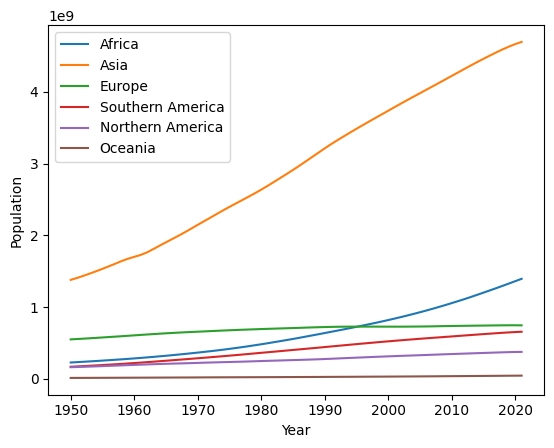

In [13]:

plt.plot(xAfrica, yAfrica, label = "Africa")
plt.plot(xAsia, yAsia, label = "Asia")
plt.plot(xEurope, yEurope, label = "Europe")
plt.plot(xSAmerica, ySAmerica, label = "Southern America")
plt.plot(xNAmerica, yNAmerica, label = "Northern America")
plt.plot(xOceania, yOceania, label = "Oceania")
plt.xlabel('Year')
plt.ylabel('Population')

plt.legend()
plt.show()

# Deep Learning for Time-Series

Let's model airplane passengers by forecasting the monthly number of passengers ( in units of 1,000). This is example of applying recurrent neural network.

In [14]:
import pandas as pd
passengers=pd.read_csv('/content/drive/My Drive/TimeSeries/passengers.csv', parse_dates=['date']).set_index('date')
passengers.head()

,passengers
date,
1949-01-31,112.0
1949-02-28,118.0
1949-03-31,132.0
1949-04-30,129.0
1949-05-31,121.0


##Recurrent neural network

We will use TensorFlow libraries, which will be installed next.

In [15]:
!pip install -U tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [16]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense, Input, Bidirectional, LSTM

import pandas as pd

Resampling passenger numbers:

In [17]:
def wrap_data(df, lookback: int):
  dataset = []
  for index in range(lookback, len(df+1)):
    features = {
        f"col_{i}": float(val) for i, val in enumerate(
            df.iloc[index-lookback:index].values
        )
    }
    row = pd.DataFrame.from_dict([features])
    row.index = [df.index[index-1]]
    dataset.append(row)
  return pd.concat(dataset, axis=0)

This function goes over all the points in the dataset and takes a sequence leading up to it. The number of points in the new sequence is defined by the parameter *lookback*, which is the number of previous time steps to use as input variables to predict the next time period. After trials we are using lookback of 3.

In [67]:
LOOKBACK = 3
dataset = wrap_data(passengers, lookback=LOOKBACK)
dataset = dataset.join(passengers.shift(-1))
dataset

,col_0,col_1,col_2,passengers
1949-03-31,112.0,118.0,132.0,129.0
1949-04-30,118.0,132.0,129.0,121.0
1949-05-31,132.0,129.0,121.0,135.0
1949-06-30,129.0,121.0,135.0,148.0
1949-07-31,121.0,135.0,148.0,148.0
...,...,...,...,...
1960-07-31,472.0,535.0,622.0,606.0
1960-08-31,535.0,622.0,606.0,508.0
1960-09-30,622.0,606.0,508.0,461.0
1960-10-31,606.0,508.0,461.0,390.0


The network is defined by this function:

In [68]:
def create_model(passengers):
  input_layer = Input(shape=(LOOKBACK, 1))
  recurrent = Bidirectional(LSTM(20, activation="relu"))(input_layer)
  output_layer = Dense(1)(recurrent)
  model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
  model.compile(loss='mse', optimizer=keras.optimizers.Adagrad(),
                metrics=[keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()])
  return model

This is bidirectional LSTM (Long Short-Term Memory) network. The network layer processes the input sequence in both forward and backward directions simultaneously. During the forward pass, the LSTM layer captures information from the past (previous time steps), while during the backward pass, it captures information from the future (following time steps). This bidirectional processing allows the model to effectively capture long-term dependencies in the input sequence.

In [20]:
from sklearn.model_selection import train_test_split

In [69]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = create_model(passengers)
model.summary()
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns='passengers'),
                                                    dataset['passengers'],
                                                    shuffle=False)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 bidirectional_8 (Bidirecti  (None, 40)                3520      
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 1)                 41        
                                                                 
Total params: 3561 (13.91 KB)
Trainable params: 3561 (13.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Let's train the model:

In [70]:
model.fit(X_train, y_train, epochs=1000, callbacks=[callback])

Epoch 1/1000
4/4 [==============================] - 3s 7ms/step - loss: 69479.5391 - root_mean_squared_error: 263.5897 - mean_absolute_error: 246.7976
Epoch 2/1000
4/4 [==============================] - 0s 7ms/step - loss: 63852.3125 - root_mean_squared_error: 252.6902 - mean_absolute_error: 236.0799
Epoch 3/1000
4/4 [==============================] - 0s 7ms/step - loss: 58604.7227 - root_mean_squared_error: 242.0841 - mean_absolute_error: 226.1415
Epoch 4/1000
4/4 [==============================] - 0s 7ms/step - loss: 52590.5508 - root_mean_squared_error: 229.3263 - mean_absolute_error: 215.2684
Epoch 5/1000
4/4 [==============================] - 0s 8ms/step - loss: 47075.0352 - root_mean_squared_error: 216.9678 - mean_absolute_error: 204.6958
Epoch 6/1000
4/4 [==============================] - 0s 7ms/step - loss: 45115.1758 - root_mean_squared_error: 212.4033 - mean_absolute_error: 200.7020
Epoch 7/1000
4/4 [==============================] - 0s 7ms/step - loss: 43913.6914 - root_mean

We get the predictions for the test set

In [71]:
predicted = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


Let's visualize passenger predictions against the actual passenger values.

In [26]:
import matplotlib.pyplot as plt

In [72]:
def show_result(y_test, predicted):
  plt.figure(figsize=(16, 6))
  plt.plot(y_test.index, predicted, 'o-', label='predicted')
  plt.plot(y_test.index, y_test, '.-', label='actual')
  plt.ylabel('Passengers')
  plt.legend()

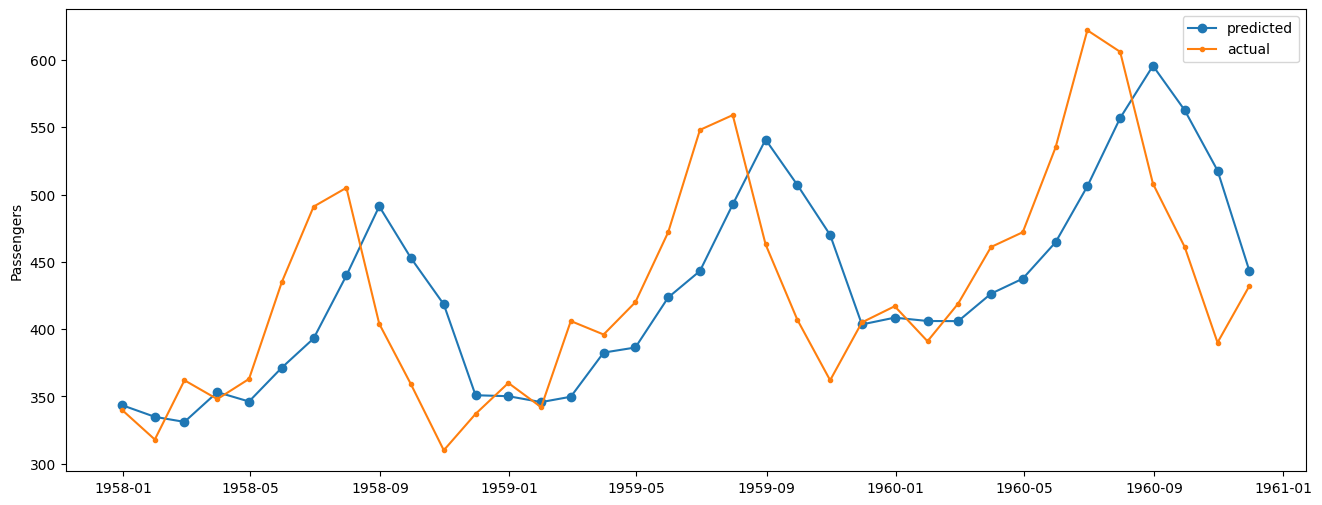

In [73]:
show_result(y_test, predicted)

In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 40)                3520      
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 3561 (13.91 KB)
Trainable params: 3561 (13.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
